In [38]:
'''
        Author: Vincent Liu
        Reference: 
            1. https://mubaris.com/2017/10/01/kmeans-clustering-in-python/
            2. http://sepans.github.io/weather-mining/method.html
'''

# Import the file
import pandas as pd
import numpy as np

df = pd.read_csv('/Users/derekliu/Downloads/Edited_Tags.csv',index_col = 0, thousands  = ',')
# Put all activity names into a list and clean the list
# acts = []
# for index, row in df.iterrows():
#     if str(row["CoCurriculars"]) != 'nan':
#         acts.append(str(row["CoCurriculars"]))
df.drop(['community'], axis = 1)
df = df.T
df.index.names = ['Tags']
df.columns.names = ['CoCurricular']

In [39]:
# Dimension reduction using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(df)

existing_2d = pca.transform(df)

existing_df_2d = pd.DataFrame(existing_2d)
existing_df_2d.index = df.index
existing_df_2d.columns = ['PC1','PC2']

# multiply the value so it's easy to see the difference
existing_df_2d = existing_df_2d * 50
existing_df_2d.head()

# print(pca.explained_variance_ratio_) 

# ## Plot activities on 2D
# %matplotlib inline
# ax = existing_df_2d.plot(kind='scatter', x='PC2', y='PC1', figsize=(16,8))
# for i, country in enumerate(df.index):
#     ax.annotate(country, (existing_df_2d.iloc[i].PC2, existing_df_2d.iloc[i].PC1))

,PC1,PC2
Tags,,
teamwork,76.601186,156.709073
tech,83.094111,219.402053
design,-5.588846,93.406491
community,330.076512,-91.609063
engineering,76.989036,94.225000


In [41]:
from sklearn.cluster import KMeans

# fit the data and add a column of cluster to the df
clusters = KMeans(n_clusters=10, n_init = 50).fit(df)
existing_df_2d['cluster'] = pd.Series(clusters.labels_, index=existing_df_2d.index)

# export the df to csv with the cluster number
existing_df_2d.to_csv('/Users/derekliu/Desktop/Cluster_Tagwords.csv')

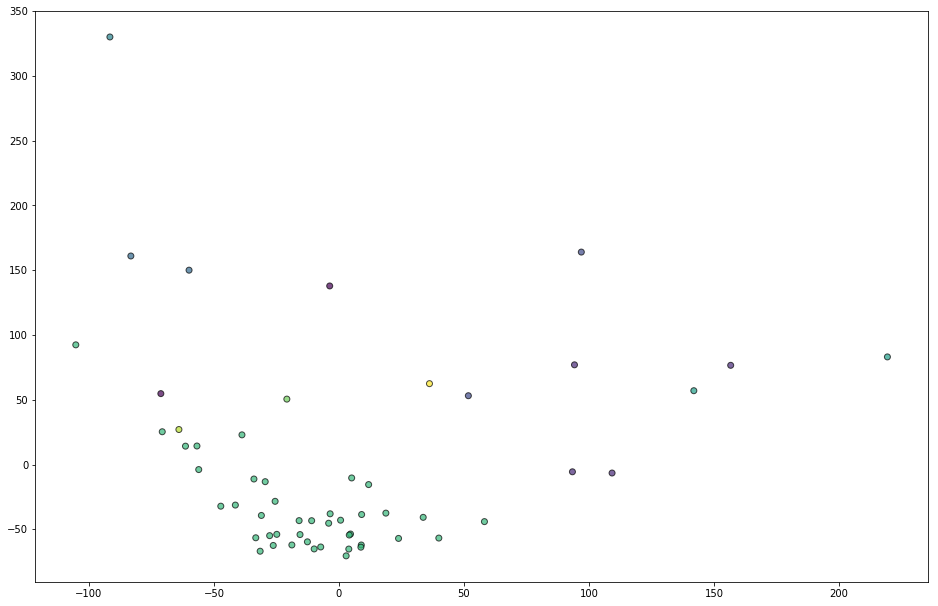

In [42]:
## plot the clusters
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 10.5))
axk = plt.scatter(existing_df_2d['PC2'], existing_df_2d['PC1'], c=clusters.labels_.astype(float), alpha = 0.7,facecolor='w', edgecolor='k')
plt.show(axk)
## Another way to plot with annotation. Messy and Colorless.
# axk =existing_df_2d.plot(
#     kind='scatter',
#     x='PC2',y='PC1',
#   #c=LABEL_COLOR_MAP,
#     c=existing_df_2d.cluster.astype(np.float), 
#     figsize=(16,8)
# )
# for i, org in enumerate(existing_df_2d.index):
#     axk.annotate(org, (existing_df_2d.iloc[i].PC2, existing_df_2d.iloc[i].PC1)) 